# 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

강아지 고양이 각 2000장 분류
- 기본 모델 정확도 71%
- 과대 적합을 줄이기 위해 데이터 증식(data augmentation) 사용시 정확도 82%
- 사전 훈련된 네트워크로 특성을 추출 정확도 90%
- 사전 훈련된 네트워크를 세밀하게 튜닝 정확도 92%

이런 세 가지 전략(처음부터 작은 모델을 훈련하기, 사전 훈련된 모델을 사용하여 특성 추출하기, 사전 훈련된 모델을 세밀하게 튜닝하기)은 작은 데이터셋에서 이미지 분류 문제를 수행할 때 여러분의 도구 상자에 포함되어 있어야 합니다.

### 5.2.1 작은 데이터셋 문제에서 딥러닝의 타당성
딥러닝은 데이터가 풍부할 때만 작동한다는 말은 부분적으로는 맞습니다. 하지만 모델이 작고 규제가 잘 되어 있으며 간단한 작업이라면 수백 개의 샘플로도 충분할 수 있습니다.

### 5.2.2 데이터 내려받기
원본 데이터셋을 [https://www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats/data) 에서 내려받을 수 있습니다.

#### 코드 5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [1]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [3]:
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [4]:
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [5]:
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수: 500


In [6]:
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수: 500


In [7]:
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수: 500


### 5.2.3 네트워크 구성하기
#### 코드 5-5 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.
d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\git\jongkwangyun.github.io\aikerasstudy\aikeras\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### 코드 5-6 모델의 훈련 설정하기

In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

### 5.2.4 데이터 전처리
데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다.
1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3. 그다음 부동 소수 타입의 텐서로 변환합니다.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).

케라스는 이런 단계를 자동으로 처리하는 유틸리티가 있습니다.

#### 코드 5-7 ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 파이썬 제너레이터 이해하기
```
def generator():
  i = 0
  while True:
    i += 1
    yield i

  for item in generator():
    print(item)
    if item > 4:
      break
```
다음과 같이 출력됩니다.
```
1
2
3
4
5
```

In [11]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


#### 코드 5-8 배치 제너레이터를 사용하여 모델 훈련하기

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 23s 228ms/step - loss: 0.6899 - acc: 0.5285 - val_loss: 0.6720 - val_acc: 0.5500
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.6648 - acc: 0.5895 - val_loss: 0.6473 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6318 - acc: 0.6425 - val_loss: 0.6344 - val_acc: 0.6240
Epoch 4/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5779 - acc: 0.6980 - val_loss: 0.5849 - val_acc: 0.6870
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5464 - acc: 0.7075 - val_loss: 0.6107 - val_acc: 0.6520
Epoch 6/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5174 - acc: 0.7360 - val_loss: 0.5587 - val_acc: 0.7120
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4934 - acc: 0.7575 - val_loss: 0.5487 - val_acc: 0.7090
Epoch 8/30
100/100 [==============================] - 5s 50ms/step 

In [13]:
model.save('cats_and_dogs_small_1.h5')

#### 코드 5-10 훈련의 정확도와 손실 그래프 그리기

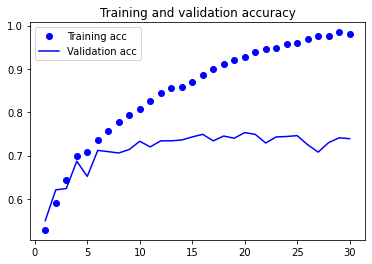

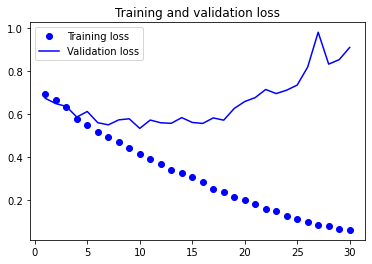

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면에 검증 정확도는 70~72%에서 멈추었습니다.

비교적 훈련 샘플 수(2000개)가 적기 때문에 과대적합이 가장 중요한 문제입니다. 여기에서는 컴퓨터 비전에 특화되어 있어서 딥러닝으로 이미지를 다룰 때 매우 일반적으로 사용되는 새로운 방법인 데이터 증식을 시도해 보겠습니다.

### 5.2.5 데이터 증식 사용하기
데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법입니다. 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘립니다.

케라스에서는 ImageDataGenerator가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있습니다.

#### 코드 5-11 ImageDataGenerator를 사용하여 데이터 증식 설정하기

In [15]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

추가적인 매개변수가 몇 개 더 있습니다.
- rotation_range: 랜덤하게 사진을 회전시킬 각도(0~180)
- width_shift_range, height_shift_range: 사진을 수평과 수직으로 랜덤하게 평행 이동 시킬 범위(전체 너비와 높이에 대한 비율)
- shear_range: 랜덤하게 전단 변환(shearing transformation)을 적용할 각도 범위
- zoom_range: 랜덤하게 사진을 확대할 범위
- horizontal_flip: 랜덤하게 이미지를 수평으로 뒤집기
- fill_mode: 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

#### 코드 5-12 랜덤하게 증식된 훈련 이미지 그리기

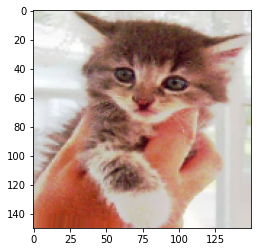

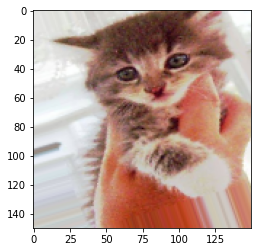

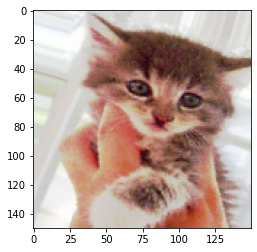

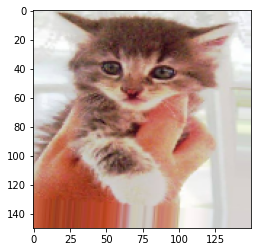

In [16]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

적은 수으 ㅣ원본 이미지에서 만들어졌기 때문에 여전히 입력 데이터들 사이에 상호 연관성이 큽니다. 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 dropout 층을 추가하겠습니다.

#### 코드 5-13 드롭아웃을 포함한 새로운 컨브넷 정의하기

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

#### 코드 5-14 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6926 - acc: 0.5150 - val_loss: 0.6837 - val_acc: 0.5857
Epoch 2/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6829 - acc: 0.5637 - val_loss: 0.6561 - val_acc: 0.6134
Epoch 3/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6700 - acc: 0.5875 - val_loss: 0.6691 - val_acc: 0.5755
Epoch 4/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6521 - acc: 0.6163 - val_loss: 0.6316 - val_acc: 0.6366
Epoch 5/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6386 - acc: 0.6381 - val_loss: 0.6167 - val_acc: 0.6485
Epoch 6/100
100/100 [==============================] - 20s 202ms/step - loss: 0.6223 - acc: 0.6606 - val_loss: 0.5842 - val_acc: 0.6862
Epoch 7/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6108 - acc: 0.6697 -

데이터 증식과 드롭아웃 덕택에 더 이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성했습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.

다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크 층의 수 등) 86% 나 87% 정도까지더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다.